# Problem Set 2

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Exercise 1: Minimization using penalty function method
minimise $\theta(x)=(x_1-2)^4+(x_1-2x_2)^2$ $\hspace{5mm}$ s.t $\hspace{2mm}$ $x_2=x_1^2$

First, we pick a penalty function; we pick a common penalty function $P(x_1,x_2,\dots,x_n)=g(x)^2$

We reformulate the problem to fit to the penalty function theory. For that we minimise $f(x)=(x_1-2)^4+(x_1-2x_2)^2 + c\underbrace{(x_2-x_1^2)^2}_{\text{Penalty function}}$ subject to the constraint $x_2-x_1^2=0 \implies g(x)=x_2-x_1^2$ 

To solve the problem, we use Newtons's Method. For that we compute the gradient

$\nabla f(x) = \begin{bmatrix} 4(x_1 - 2)^3 + 2(x_1 - 2x_2) - 4x_1c(x_2-x_1^2) \\ -4(x_1 - 2x_2) + 2c(x_2-x_1^2) \end{bmatrix}$

We also need the Hessian

$H_f(x)= \begin{bmatrix} 12(x_1-2)^2+2-4cx_2+12x_1^2c & -4-4x_1c\\ -4-4x_1c & 8x_2+2c \end{bmatrix}$

Finally, we need to solve Newton's Equation:

$x_{k+1}=x_k-H_f^{-1}(x_k)\nabla f(x_k)$


In [156]:
def theta(x_1,x_2):
    return (x_1 - 2) ** 4 + (x_1 - 2 * x_2) ** 2 

def g(x_1,x_2):
    return (x_2 - x_1 ** 2)

def f(x_1, x_2,c):
    return theta(x_1,x_2) + c * g(x_1,x_2) ** 2

def grad_f(x_1, x_2, c):
    return np.array([(4 * (x_1 - 2) ** 3 + 2 * (x_1 - 2 * x_2) - 4 * x_1 * c * (x_2 - x_1**2)),
                     (-4 * (x_1 - 2 * x_2) + 2 * c * (x_2 - x_1 ** 2))])

def hessian_f(x_1, x_2, c):
    return np.array([(12 * (x_1 - 2) ** 2 + 2 - 4 * c * x_2 + 12 * x_1 ** 2 * c, - 4 - 4 * x_1 * c),
                     (- 4 - 4 * x_1 * c, 8 * x_2 + 2 * c )])

def inv_hessian_f(x_1,x_2,c):
    return np.linalg.inv(hessian_f(x_1,x_2,c))

In [157]:
x_1=np.arange(-4,4,0.1)
x_2=np.arange(-4,4,0.1)
X_1,X_2=np.meshgrid(x_1,x_2)

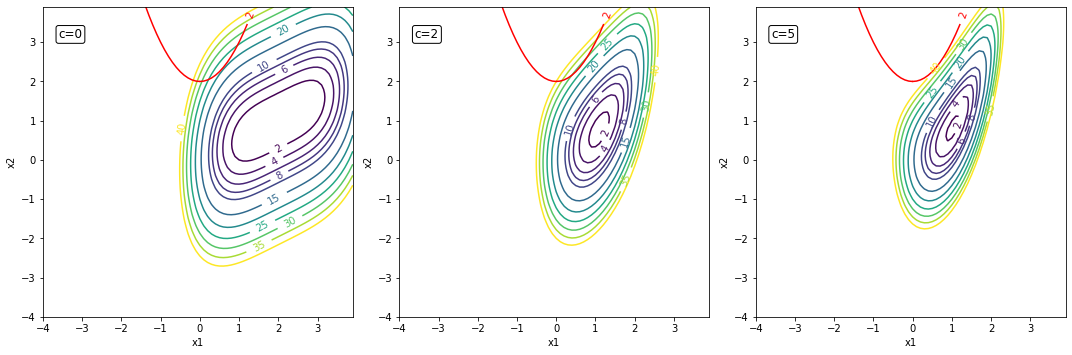

In [257]:
# How the function f(x) reacts to increse in penalty parameter c.
const = g(X_1, X_2)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Create a figure with 1 row and 3 columns of subplots

for i, c_value in enumerate([0, 2, 5]):
    X_3 = f(X_1, X_2, c_value)
    ax = axs[i]
    ax.set_aspect(aspect=1)

    CS = ax.contour(X_1, X_2, X_3, levels=[2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40])
    ax.clabel(CS, inline=1, fontsize=10)
    CS = ax.contour(X_1, X_2, const, levels=[2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40], colors="red")
    ax.clabel(CS, inline=1, fontsize=10)

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

    ax.text(0.05, 0.9, f"c={c_value}", transform=ax.transAxes, fontsize=12, color="black",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.2"))

plt.tight_layout()  # Adjust the spacing between subplots

plt.show()


### First Three iterations by hand

In [269]:
c=10
print("H_f(x_0) is Pos Definite:", np.all(np.linalg.eigvals(inv_hessian_f(0,0,c)) > 0))
x_1 = np.array([(0),(0)]) - np.dot(inv_hessian_f(0,0,c), grad_f(0,0,c))
print("theta(x_1):",theta(x_1[0],x_1[1]), "| x_1[0]=",x_1[0],"| 1_2[1]=",x_1[1])


print("H_f(x_0) is Pos Definite:", np.all(np.linalg.eigvals(inv_hessian_f(x_1[0],x_1[1],c)) > 0))
x_2 = x_1 - np.dot(inv_hessian_f(x_1[0],x_1[1],c), grad_f(x_1[0],x_1[1],c))
print("theta(x_2):",theta(x_2[0],x_2[1]), "| x_2[0]=",x_2[0],"| x_2[1]=",x_2[1])

print("H_f(x_0) is Pos Definite:", np.all(np.linalg.eigvals(inv_hessian_f(x_2[0],x_2[1],c)) > 0))
x_3 = x_2 - np.dot(inv_hessian_f(x_2[0],x_2[1],c), grad_f(x_2[0],x_2[1],c))
print("theta(x_3):",theta(x_3[0],x_3[1]), "| x_3[0]=",x_3[0],"| x_3[1]=",x_3[1])

#TODO: Plot the Function, walk step by step with the algorithm see if it works! Then.. Write it in a 
#loop with a check that the hessian is positive definite after each iteration.

H_f(x_0) is Pos Definite: True
theta(x_1): 3.4697977502321775 | x_1[0]= 0.6504065040650407 | 1_2[1]= 0.13008130081300814
H_f(x_0) is Pos Definite: True
theta(x_2): 1.9774944235546472 | x_2[0]= 1.1021941268943674 | x_2[1]= 1.1272413896808364
H_f(x_0) is Pos Definite: True
theta(x_3): 1.5179707751693994 | x_3[0]= 0.9982097668091354 | x_3[1]= 0.8564529594579027


## Algorithm

In [278]:
c=15
x = np.array([0, 0])  # Initial point
for i in range(10):  # Perform 3 iterations
    H_pos_def = np.all(np.linalg.eigvals(inv_hessian_f(x[0], x[1], c)) > 0)
    print("H_f(x_{}) is Pos Definite:".format(i+1), H_pos_def)

    x = x - np.dot(inv_hessian_f(x[0], x[1], c), grad_f(x[0], x[1], c))
    print("theta(x_{}):".format(i+1), theta(x[0], x[1]), "| x_{}[0]={}".format(i+1, x[0]), "| x_{}[1]={}".format(i+1, x[1]))

H_f(x_1) is Pos Definite: True
theta(x_1): 3.5771666975551044 | x_1[0]=0.6469002695417789 | x_1[1]=0.0862533692722372
H_f(x_2) is Pos Definite: True
theta(x_2): 1.859065009680251 | x_2[0]=1.0137343770083358 | x_2[1]=0.9845912318841814
H_f(x_3) is Pos Definite: True
theta(x_3): 1.6364446330418234 | x_3[0]=0.9717974884538233 | x_3[1]=0.8460278659452696
H_f(x_4) is Pos Definite: True
theta(x_4): 1.6369917138429764 | x_4[0]=0.9778562942116048 | x_4[1]=0.8581947025603753
H_f(x_5) is Pos Definite: True
theta(x_5): 1.6365310279863756 | x_5[0]=0.9769770425973021 | x_5[1]=0.8563233225787624
H_f(x_6) is Pos Definite: True
theta(x_6): 1.6366072558358817 | x_6[0]=0.9771036651253905 | x_6[1]=0.8565967264642812
H_f(x_7) is Pos Definite: True
theta(x_7): 1.6365961916012974 | x_7[0]=0.9770849937277423 | x_7[1]=0.8565564827594339
H_f(x_8) is Pos Definite: True
theta(x_8): 1.6365978214970816 | x_8[0]=0.977087738488888 | x_8[1]=0.8565624001413155
H_f(x_9) is Pos Definite: True
theta(x_9): 1.6365975818680

In [280]:
## Check in comparison to Scipy library //Lagrange Method

In [281]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function
def objective(x): # x here is a vector!!!
    x_1, x_2 = x
    return (x_1 - 2)**4 + (x_1 - 2*x_2)**2

# Define the constraint function
def constraint(x):
    x_1, x_2 = x
    return x_2 - x_1**2

# Define the initial guess
x0 = np.array([0, 0])

# Define the optimization problem
problem = {
    'fun': objective,
    'x0': x0,
    'constraints': [{'type': 'eq', 'fun': constraint}]
}

# Solve the optimization problem
result = minimize(**problem)

# Print the optimized solution
print(result.x)

[0.94558319 0.89412757]
